In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
# pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
data = pd.read_csv('./data/train.csv')
print(data.shape)

(891, 12)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
* The Name of the passeger
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

In [5]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All the counts are good now!

### Let's go exploring!

In [7]:
data['Died'] = 1 - data['Survived']

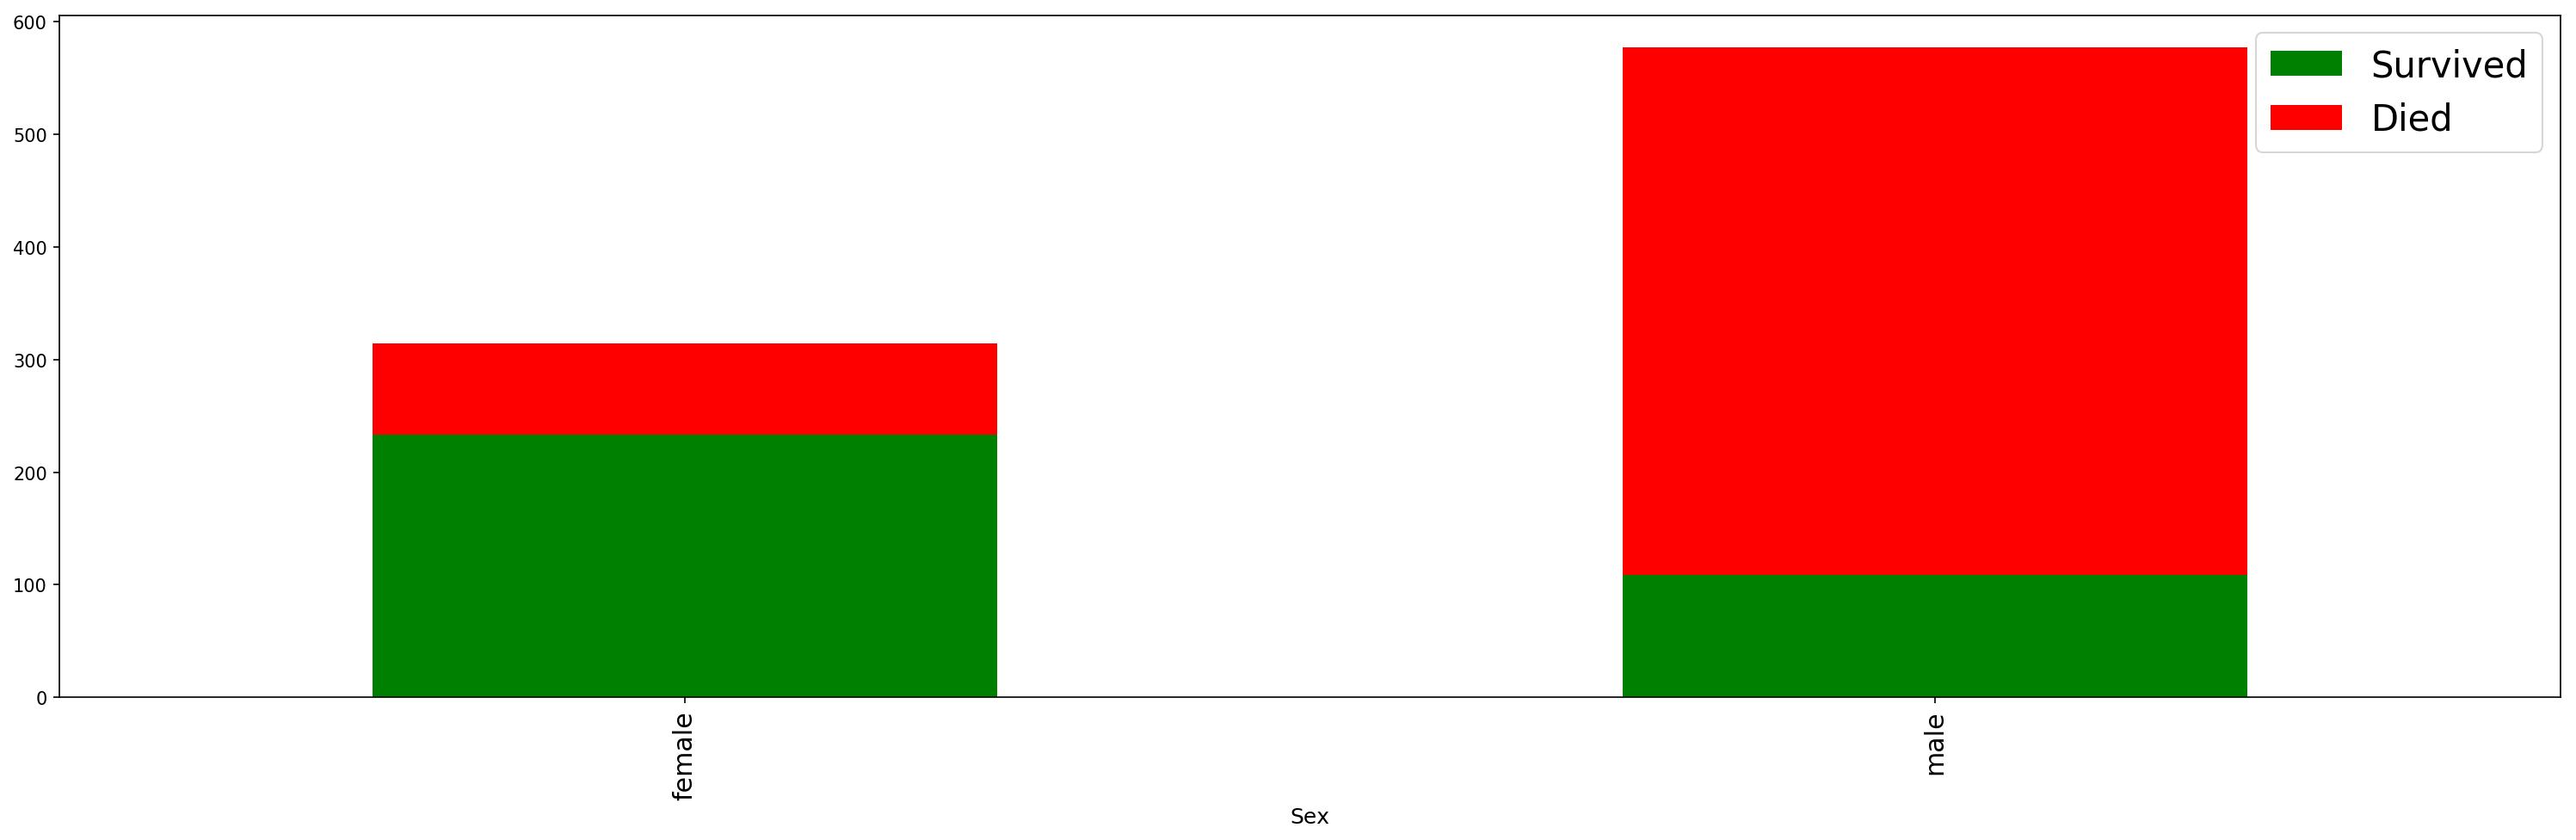

In [8]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

It looks like women and children first is true

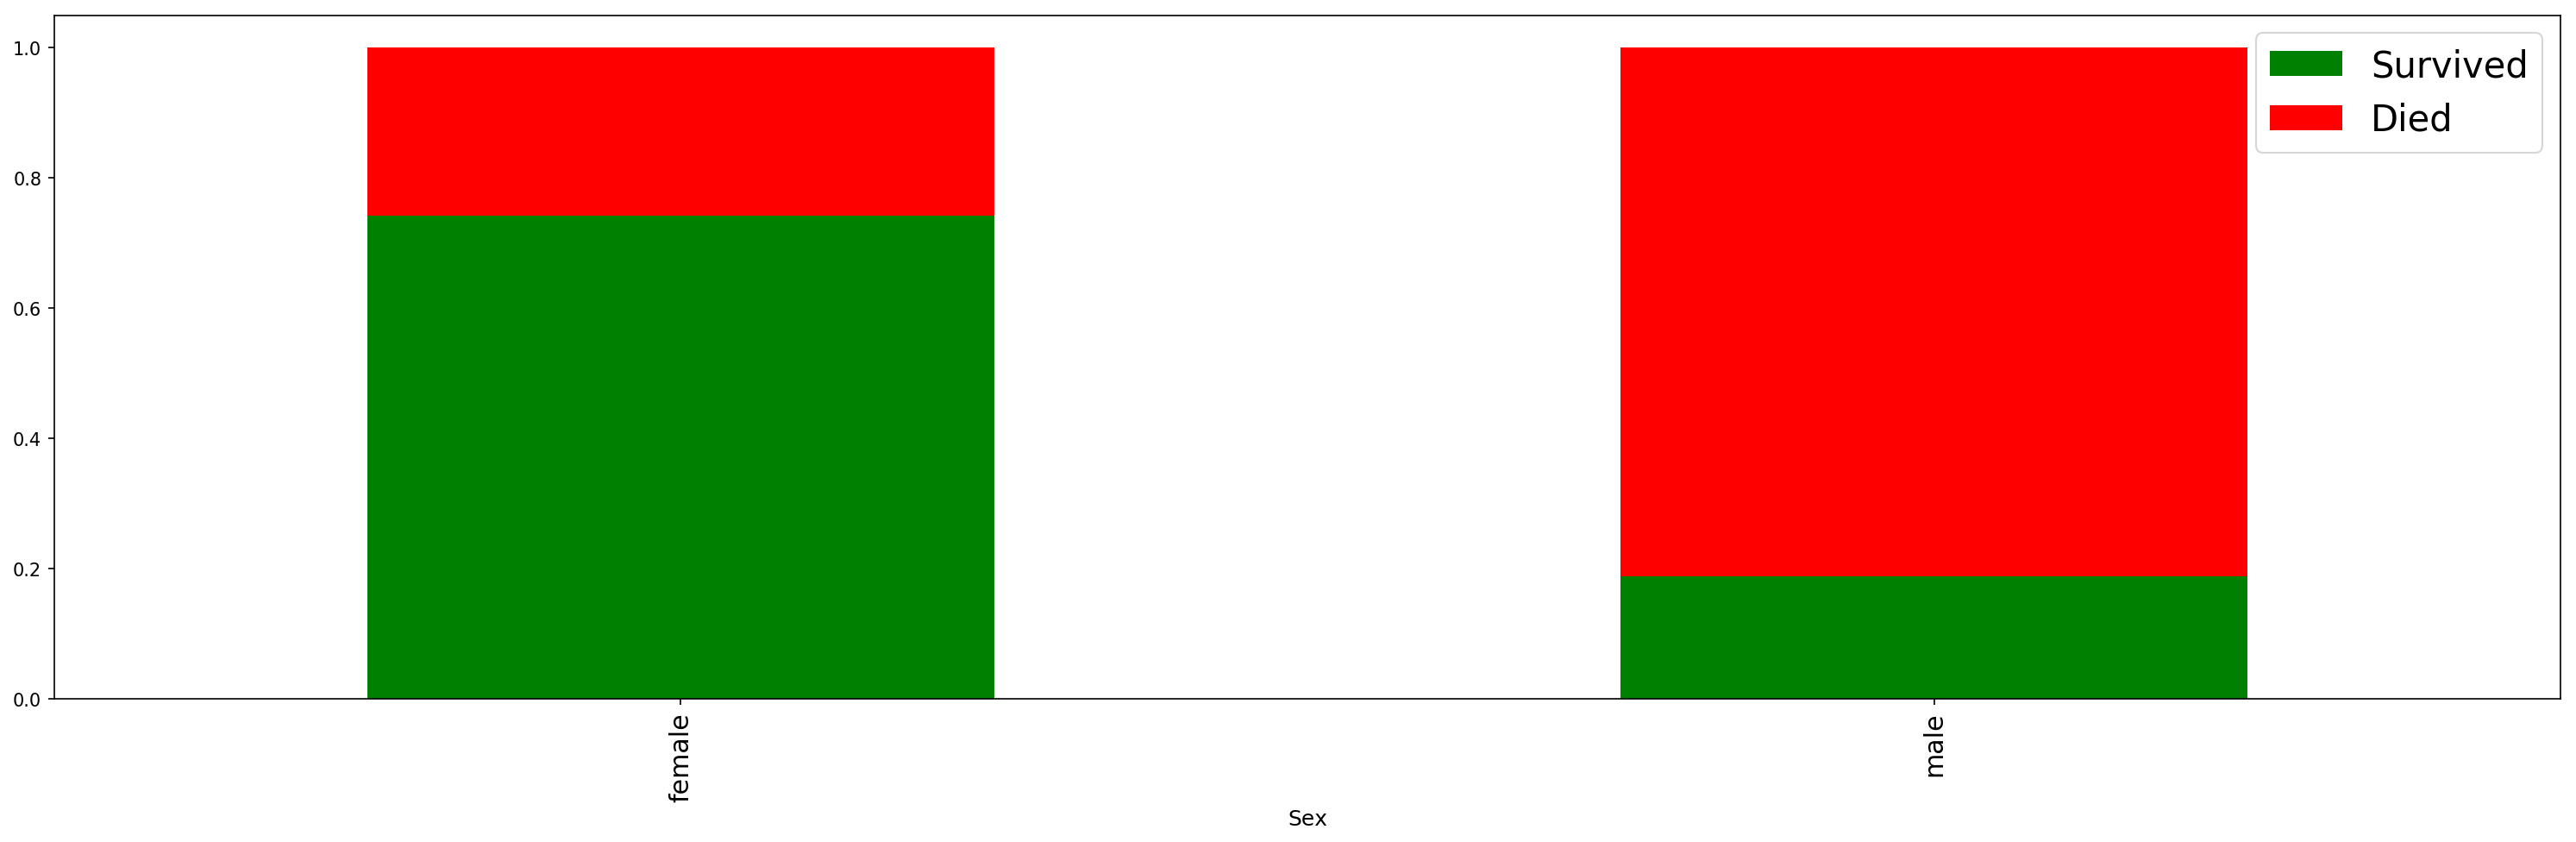

In [9]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

Yup, even by ratio.  That's good news, it looks like this will be a very predictive feature.  Let's dig in...

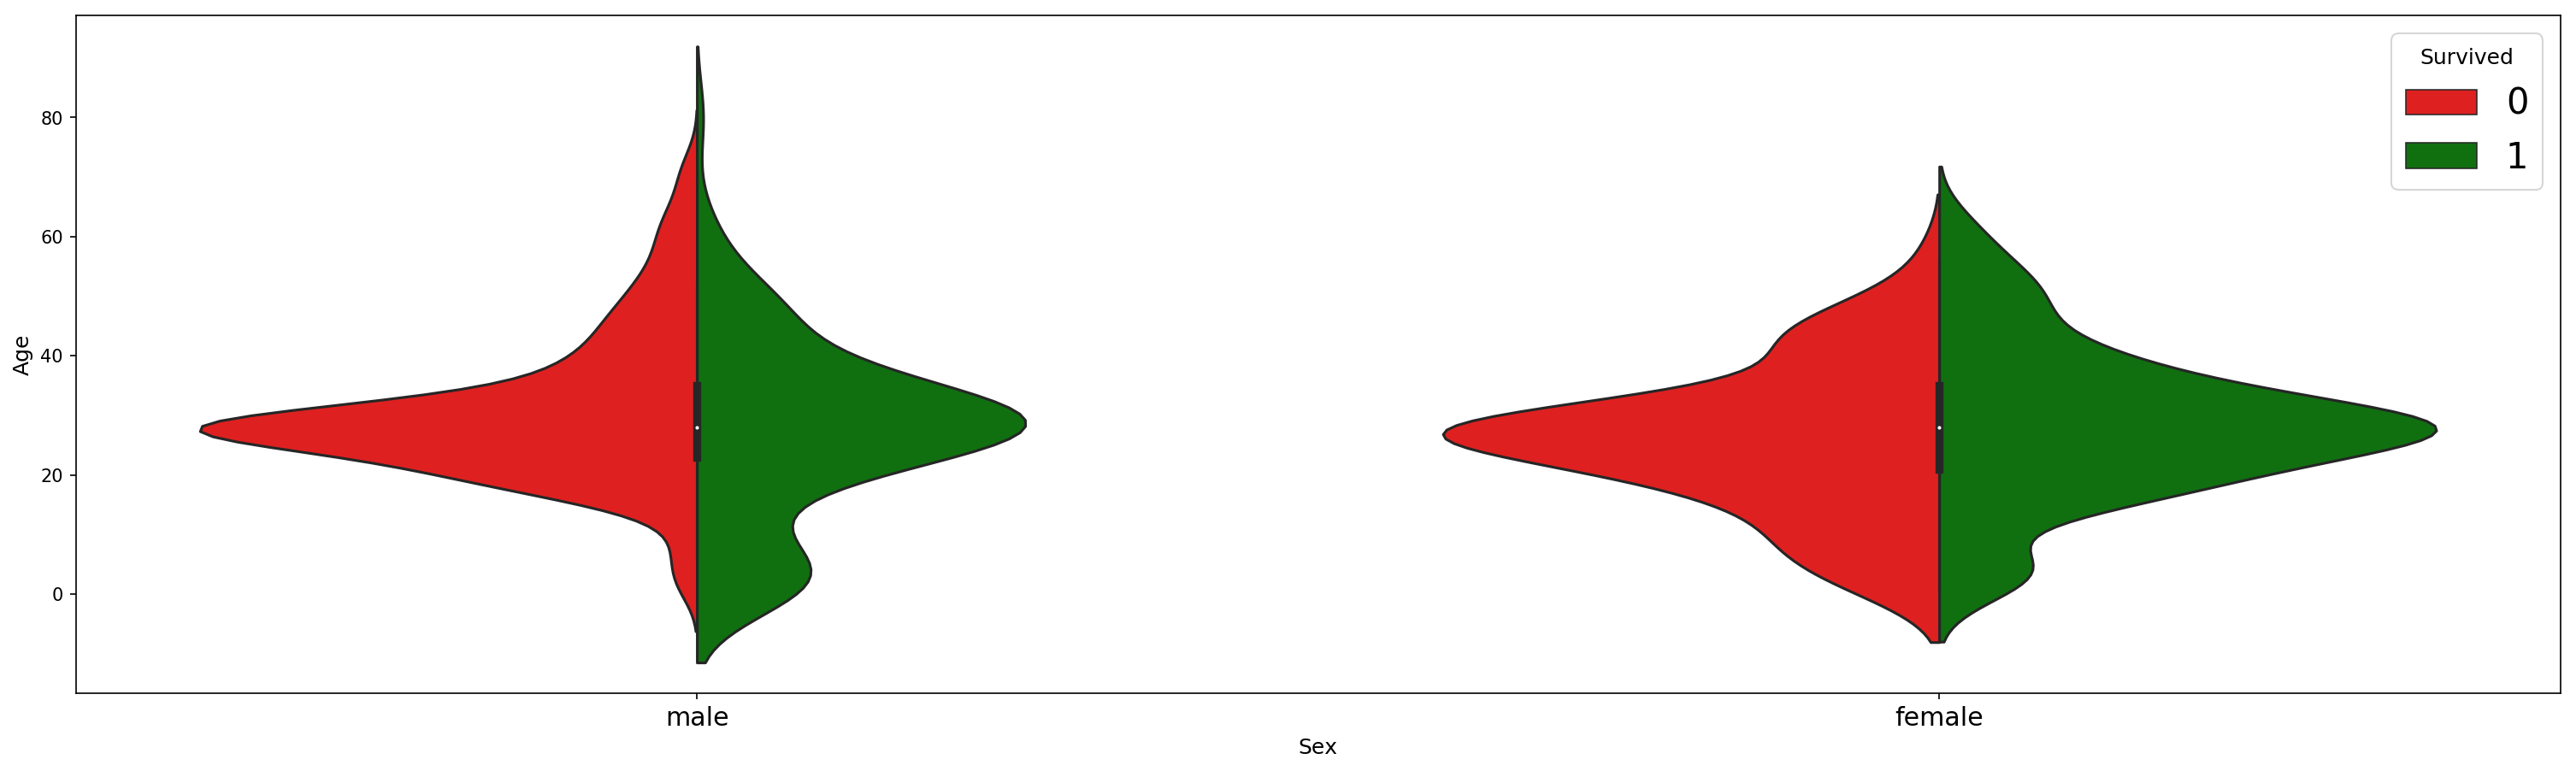

In [10]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

As we saw in the chart above and validate by the following:
* Women survive more than men, as depicted by the larger female green histogram

Now, we see that:
* Younger male tend to survive
* A large number of passengers between 20 and 40 succumb
* Age doesn't seem to have a direct impact on the female survival


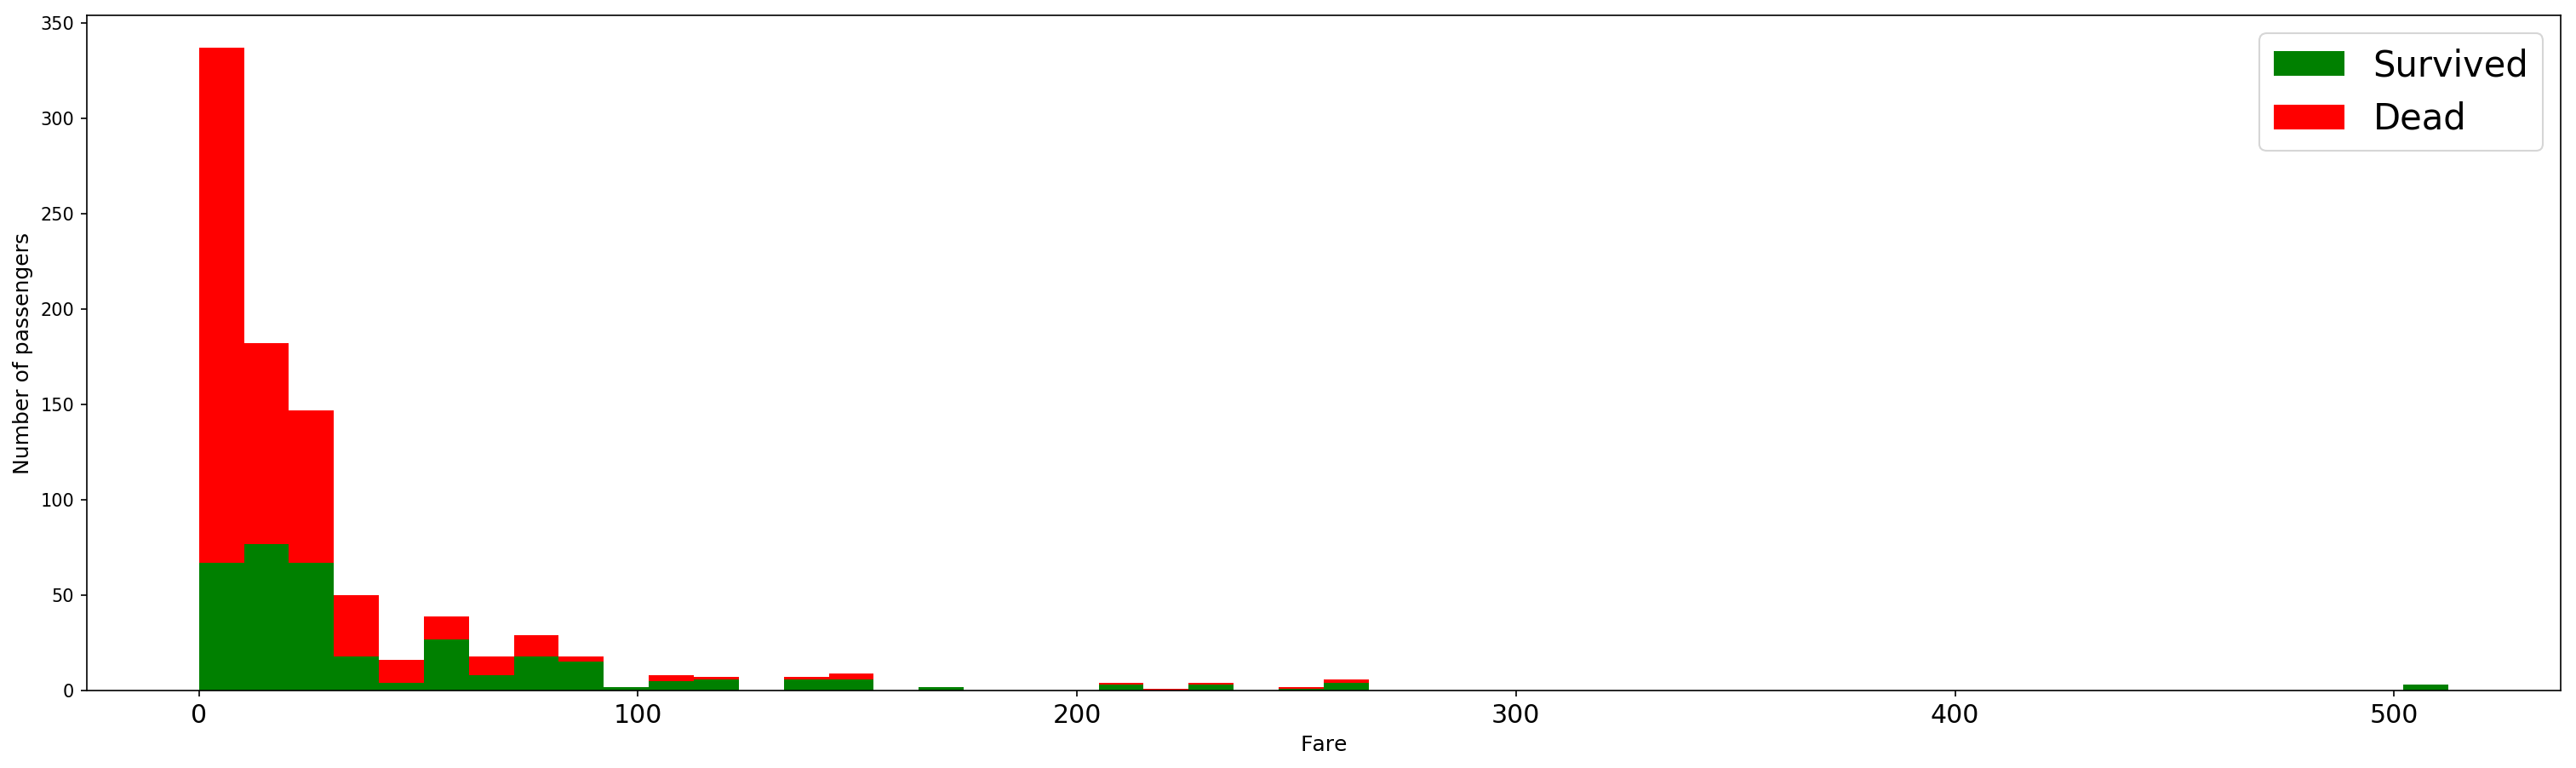

In [11]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Now we can see that Passengers with cheaper ticket fares are less likely to survive
* Passengers with more expensive tickets
* social status seems to be important; wealthy seem to be rescued first

Next we'll combine that with age:

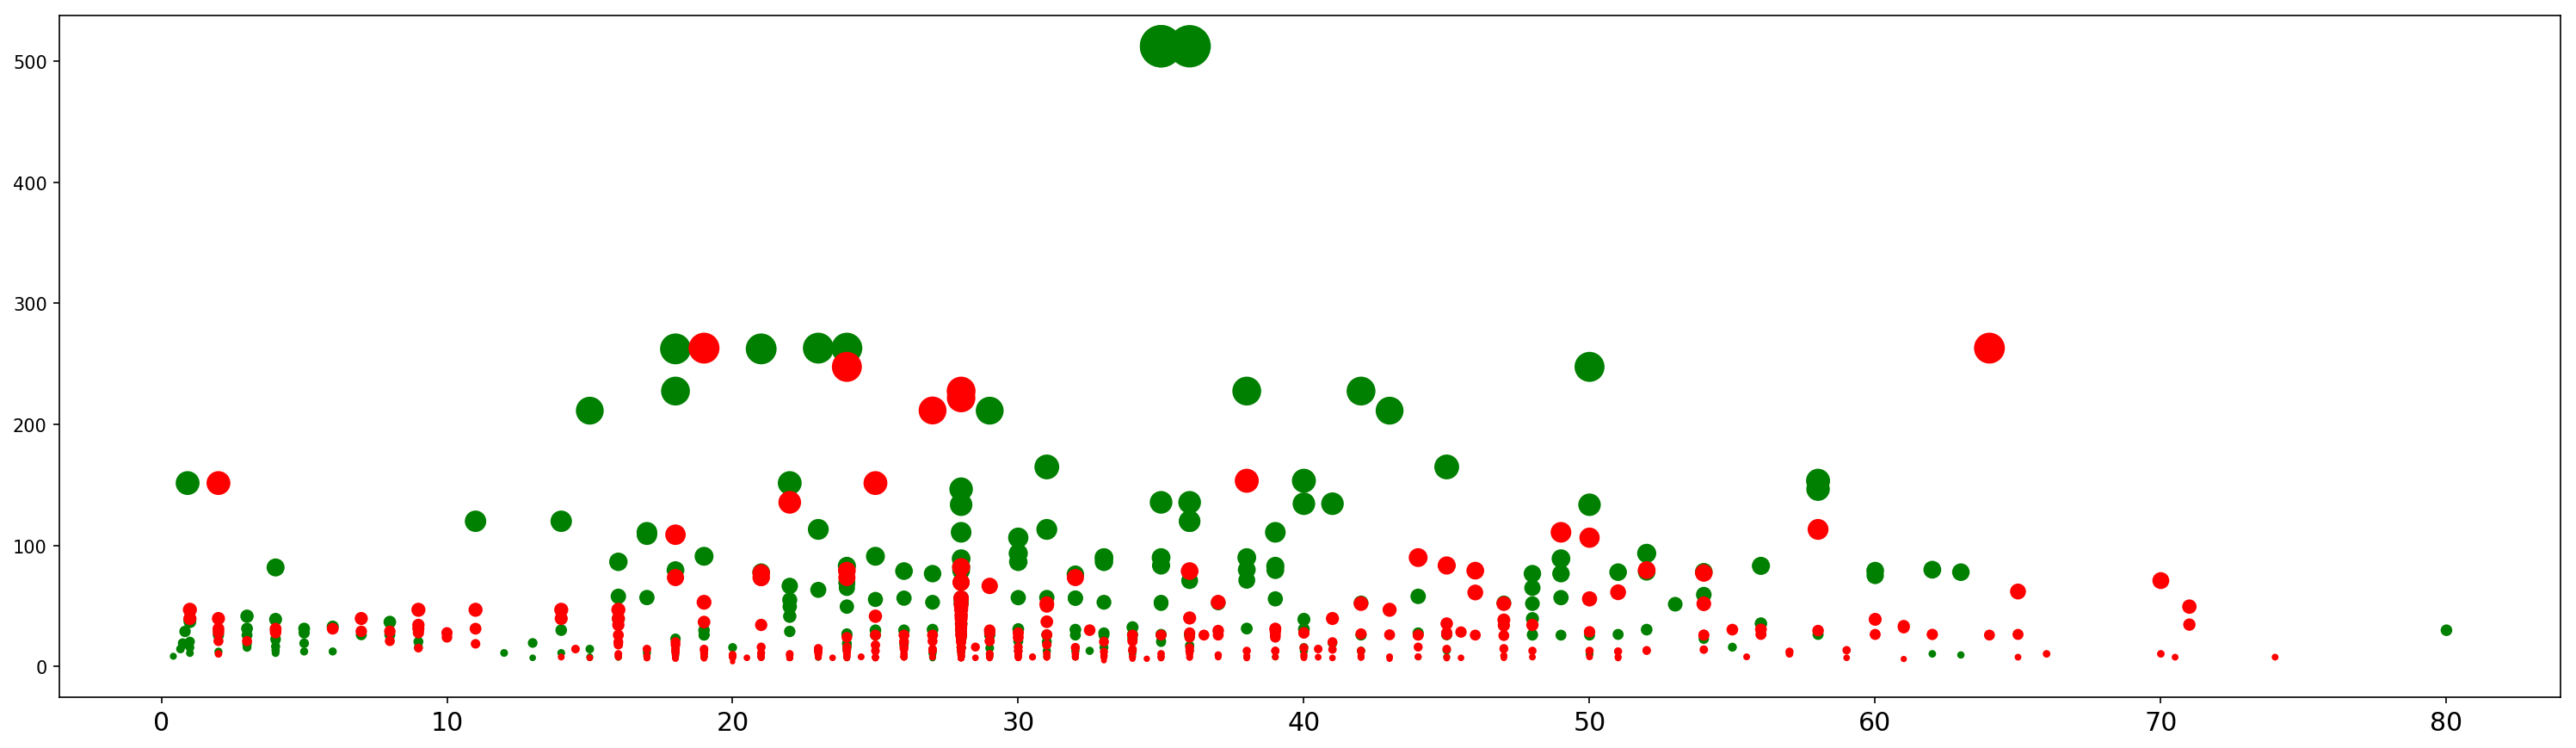

In [12]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

How to read this chart: 
* The size of the circles is proportional to the ticket fare
* The x-axis are the ages
* The y-axis the ticket fare

We can observe different clusters:
* Large green dots between x=20 and x=45: adults with the largest ticket fares
* Small red dots between x=10 and x=45, adults from lower classes on the boat
* Small greed dots between x=0 and x=7: these are the children that were saved

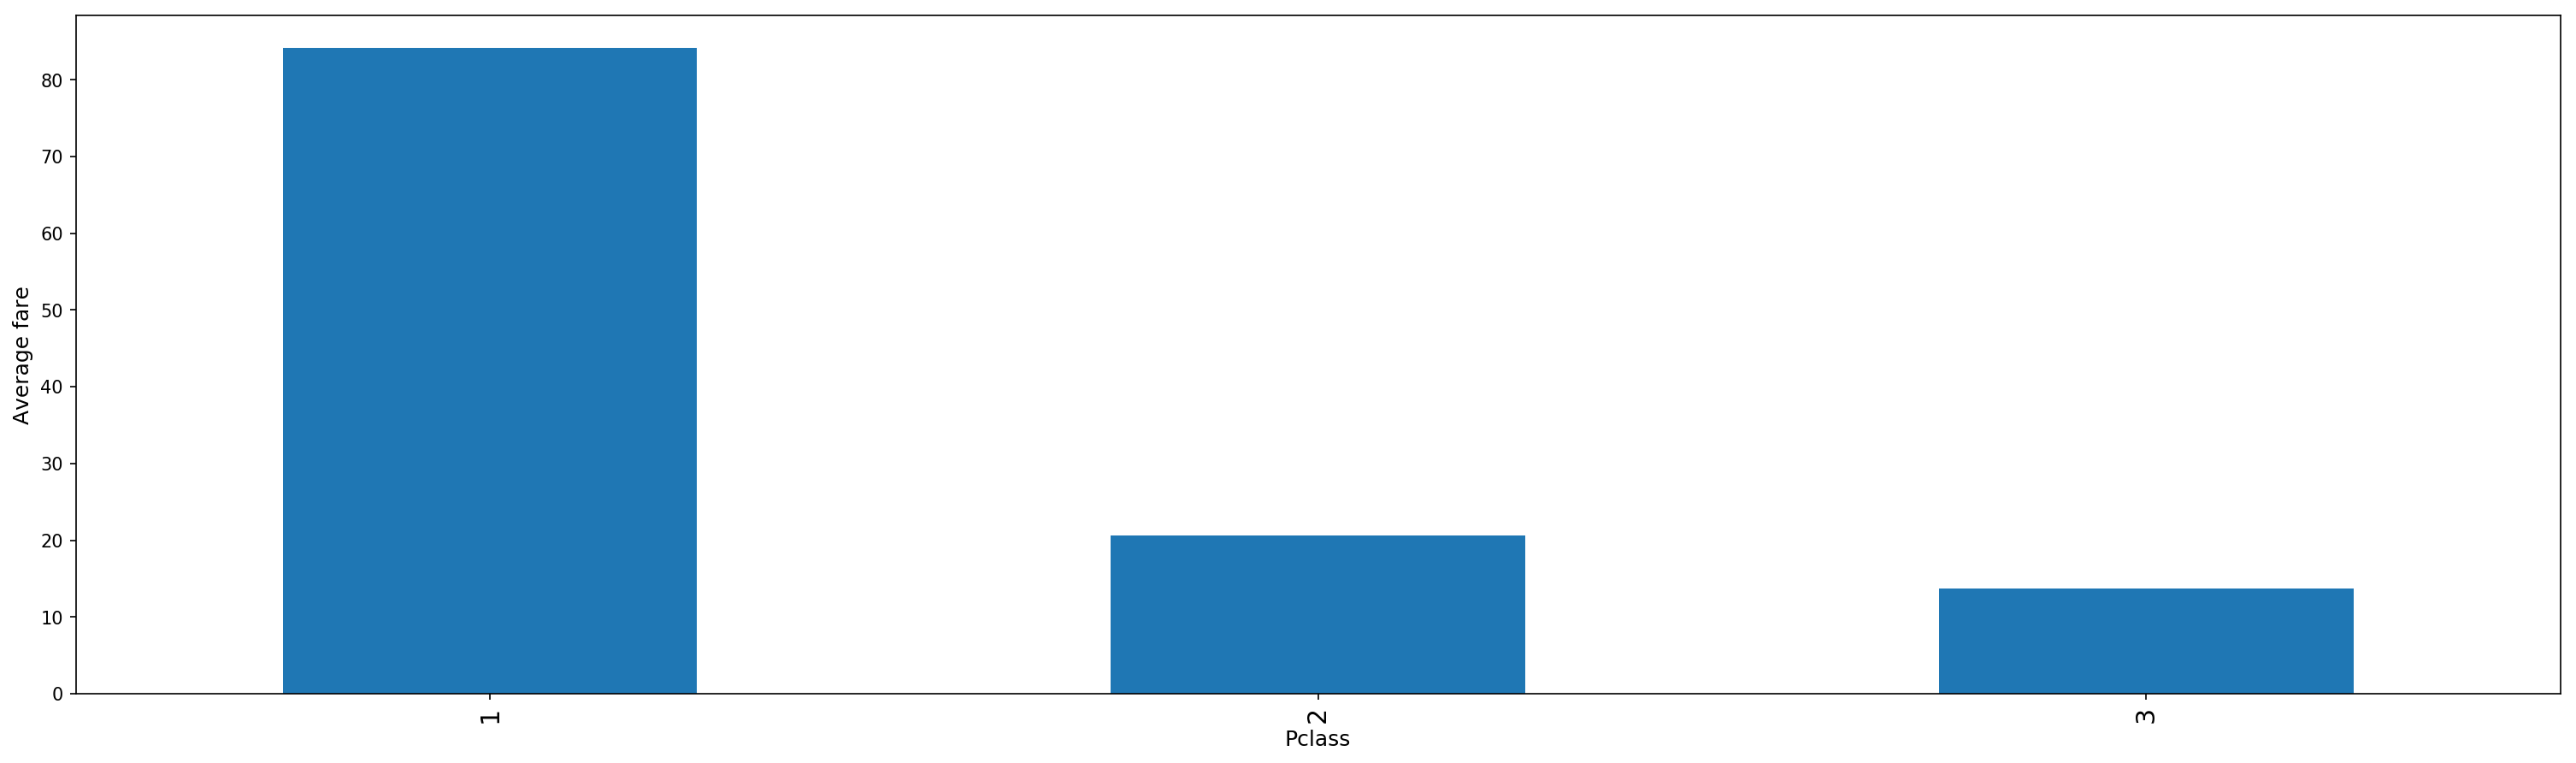

In [13]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

As expected, ticket fare correlates with the class.

Let's now see how the embarkation site affects the survival.

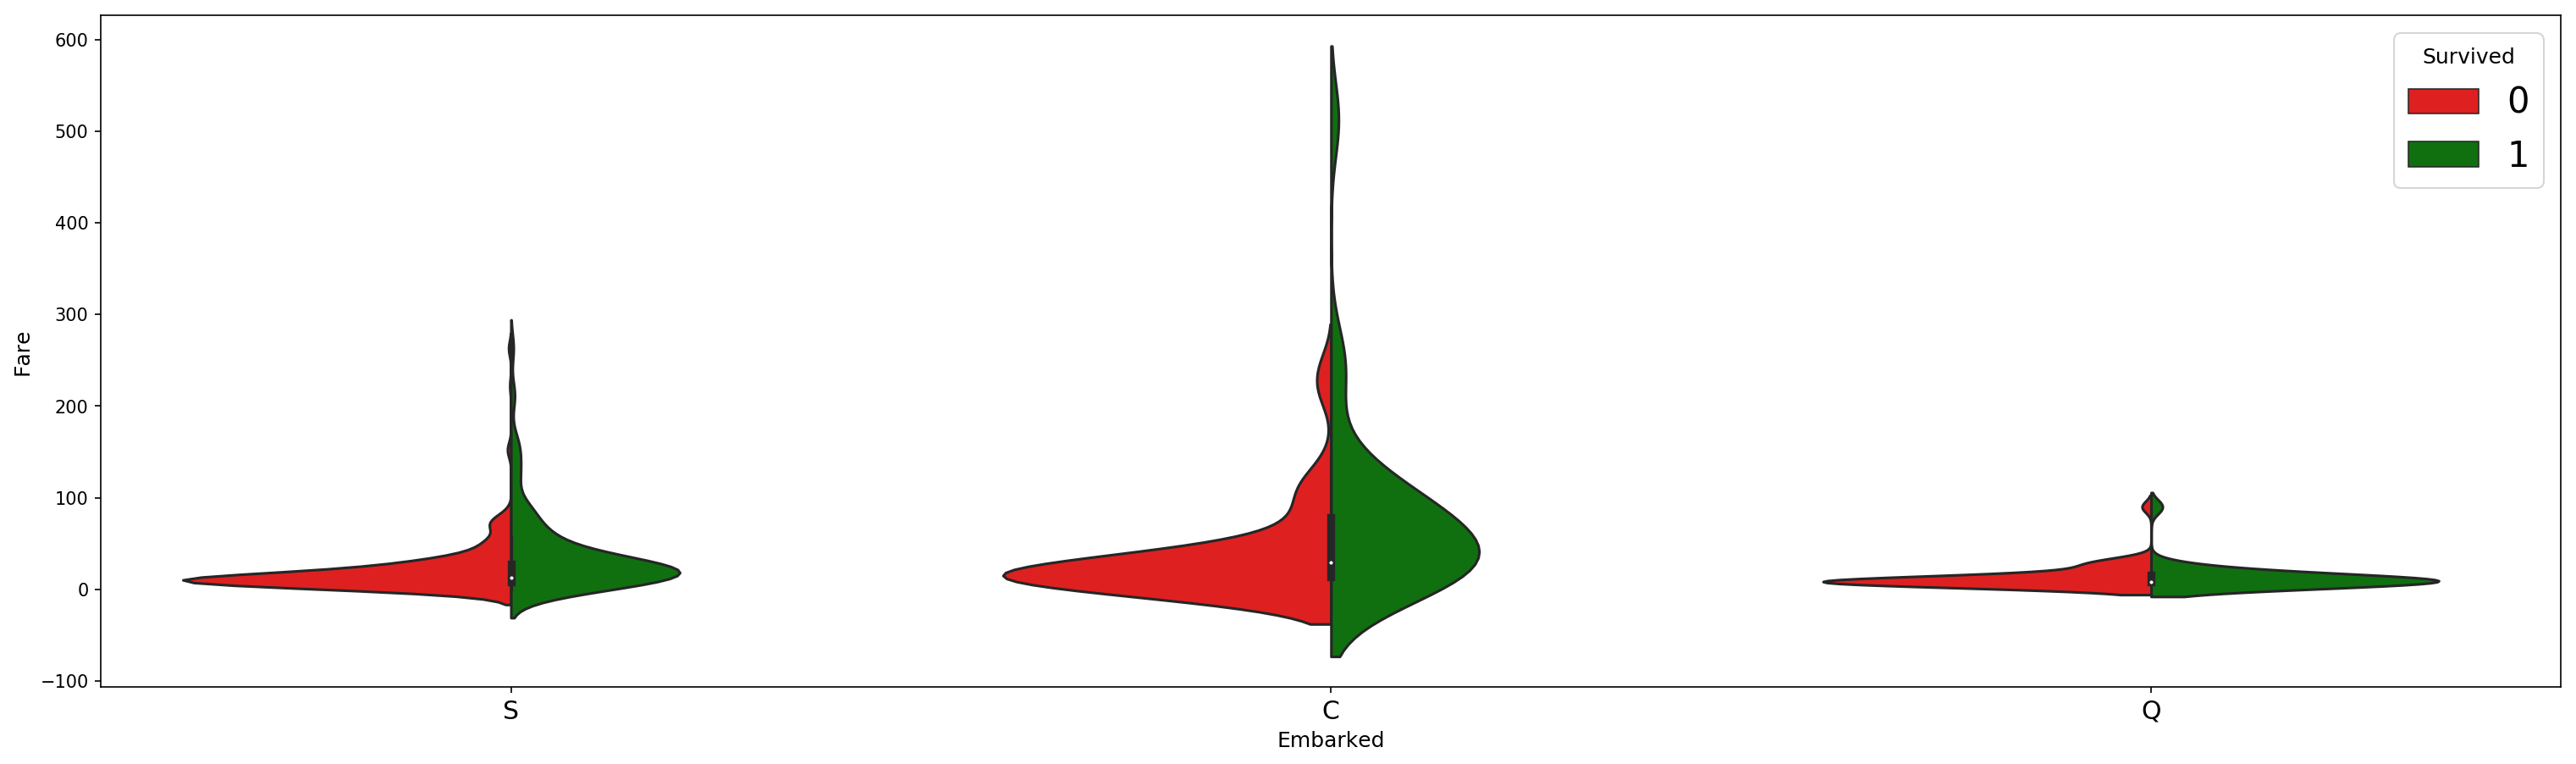

In [14]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

It seems that the embarkation C have a wider range of fare tickets and passengers who pay the highest prices are those who survive.  We also see this happening in embarkation S and less in embarkation Q.
 

### Now for some feature engineering

In [15]:
#  Good House Keeping function to see what's been processed already
# Function for keeping track of processing
def status(feature):
    print ('Processing', feature, ': ok')

In [16]:
# We all need to make sure we process both the training and teszt sets...
# Function for combining and cleaning both datasets
def get_combined_data():
    # reading train data
    train = pd.read_csv('./data/train.csv')
    
    # reading test data
    test = pd.read_csv('./data/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [17]:
combined = get_combined_data()
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the passenger names we want to extract them into useful information.

If you look closely at these first examples:
* Braund, Mr. Owen Harris
* Heikkinen, Miss. Laina
* Oliva y Ocana, Dona. Fermina
* Peter, Master. Michael J

Notice that each name has a title in it.  This can be a simple Miss. or Mrs. sometimes something more sophisticated like Master, Sir or Dona. 

Let's create an additional variable about the social status by simply parsing the name and converting to a binary variable.

We'll use the training set to determine all of the titles and then create a dictionary so we can modify titles easily if something pops up...

In [18]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Capt', 'Col', 'the Countess', 'Dr', 'Mrs', 'Master', 'Miss', 'Ms', 'Lady', 'Sir', 'Don', 'Mlle', 'Mme', 'Jonkheer', 'Rev', 'Mr', 'Major'}


In [19]:
# Dictionary of title names; this makes it easy to combine or rename titles only once
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [20]:
#Function for extracting titles
def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [21]:
combined = get_titles()

Processing Title : ok


In [22]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


Dona was not included in the training set, which is how we determined the Title Dictionary

In [24]:
Title_Dictionary["Dona"] = "Royalty"
Title_Dictionary

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Royalty',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

In [25]:
combined = get_titles()
combined.head()
combined[combined['Title'].isnull()]

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


We can see that there are no blank titles now.  Success!

From here we'll remove the naems column and hot-encode the titles so they are easier to model with. 


In [26]:
#function to finish processing the names
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    status('names')
    return combined

In [27]:
combined = process_names()

Processing names : ok


In [ ]:
combined.head()

#### Now we'll move on to AGE

We have seen in the first part that our Age variable was missing 177 values; ~13% of the dataset
Replacing with the mean or median might not be the best solution
* age may differ by title
* age may differ by sex
* age may differ by passenger class

To understand why, let's group our dataset by sex, Title and passenger class and look at the median age for each group


In [ ]:
print(combined.iloc[:891].Age.isnull().sum())

In [ ]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [ ]:
grouped_median_train.head()

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together: 
* female, from Pclass 1, and from royalty = 40.5 median age
* male, from Pclass 3, with a Mr title = 26 median age

This is a good balance of close, and fast.  We'll use this dataframe to impute the missing values.  It's handy to have a table to use so you can change values in one place if needed and run your kernal again.

In [ ]:
# function that fills missing ages
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined




In [ ]:
combined = process_age()

#### We do the same for processing fares|

In [ ]:
#function for processing missing fare values
# we use a less compilicated process here for speed; just the median
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [ ]:
combined = process_fares()


#### We do the same for processing Embarked

In [ ]:
#function to replace missing embarked values
#again we use a simple replacement with the most occuring value

def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [ ]:
combined = process_embarked()


In [ ]:
combined.head()

#### We do the same for processing Cabin

Much like title above, we need to check the test and train sets to see if they have the same unique values. 

In [ ]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [ ]:
print(train_cabin)

In [ ]:
print(test_cabin)

In [ ]:
# function to process cabin type; maps to first letter of cabin field
# NaN types are replaced with "U"
# includes hot-encoding

def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    status('cabin')
    return combined



In [ ]:
combined = process_cabin()

In [ ]:
combined.describe()

### MOAR processing - this time sex

In [ ]:
#function to process sex
# maps female to 1, male to 0
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [ ]:
combined = process_sex()


In [ ]:
combined.head()

### EVEN MOAR processing - this time Pclass

Feature engineering for DAYS. 

In [ ]:
#function to process Pclass
# hot-encodes Pclass as 1,2, or 3

def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    status('Pclass')
    return combined




In [ ]:
combined = process_pclass()

In [ ]:
combined.head()

### Processing Ticket

In [ ]:
#function for cleaning ticket text up before processing
# if ticket has no character length, set = "XXX"

def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [ ]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [ ]:
print(len(tickets))

In [ ]:
# function for processing tickets


def process_ticket():
    
    global combined
   
    # Extracting dummy variables from tickets:
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)

    status('Ticket')
    return combined

In [ ]:
combined = process_ticket()


In [ ]:
combined.head()

### Processing family

Here we are creating a whole new variable.  It's going to be how big a family was onboard.  I have a belief that large familes were more likely to be saved.

In [ ]:
# function to process family
# creates 4 new columns: Family size = total (inclusive), Singleton = 1 person, Small 2-4, Large >4

def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined


In [ ]:
combined = process_family()


In [ ]:
print(combined.shape)


We ended up with a total of 71 unique features.  We started with 12!

Code to save output files back to repo

In [ ]:
# function to split combined dataframe back into test and train sets
# we need to keep the same index so each file is the same as when we started

def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train_with_features = combined.iloc[:891]
    test_with_features = combined.iloc[891:]
    
    return train_with_features, test_with_features, targets

In [ ]:
# write processed files back to repo
train_with_features, test_with_features, targets = recover_train_test_target()

In [ ]:
# write files to repo to be used later

train_with_features.to_csv('./data/train_with_features.csv')
test_with_features.to_csv('./data/test_with_features.csv')

